In [10]:
!pip install --user dabl

Ref: https://dabl.github.io/stable/

# Introduction to Inferential Statistics

## Introduction to Probability

* Basic Probability
* Conditional Probability
* Simple Probability Distribution
* Probability Mass Function (p.m.f) & Probability Density Function (p.d.f)
* Normal Distribution
* Normal Distribution & Standard Deviation
* Concept of Z-score

## Introduction to Inference

* Sample Mean & Population Mean
* Statistical Inference
* Central Limit Theorem
* Confidence Intervals
* Interpretation Of Confidence Interval
* Hypothesis Testing
* Why Null Hypothesis ?
* Alternate Hypothesis
* P-Value
* t-test
* Type I and Type II error
* Chi-squared Goodness of fit test
* Chi-sqaured Test of Independence

In [12]:
# importing all the basic libraries

# for using division module
from __future__ import division

# for basic operations
import pandas as pd
import numpy as np

# for data visualizations
#import matplotlib.pyplot as plt
import seaborn as sns

# for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# reading the data
data = pd.read_csv('Datasets/train.csv')

# lets check the shape of the dataset
data.shape

(1460, 81)

In [14]:
# lets check the head of the dataset
#pd.set_option('max_columns', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

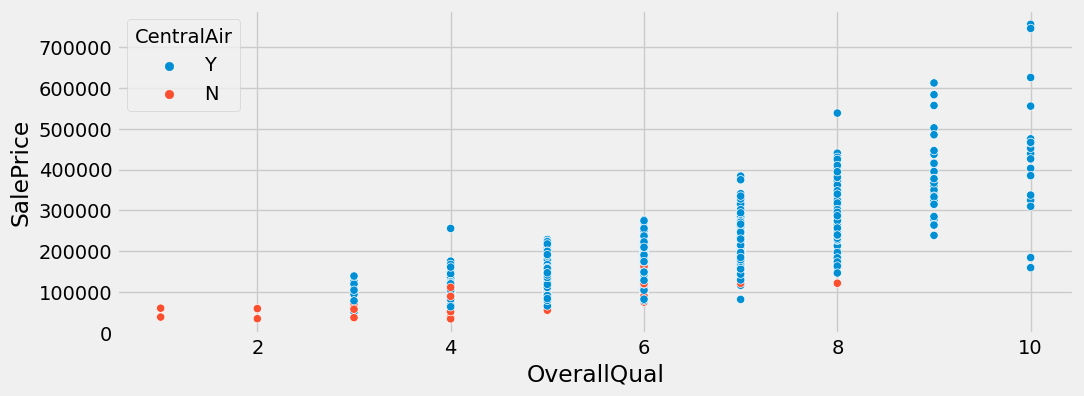

In [112]:
sns.scatterplot(x=data.OverallQual, y=data.SalePrice, hue=data.CentralAir)

Target looks like regression
Showing only top 10 of 44 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=7.30E-01'}, xlabel='GrLivArea'>,
         <Axes: title={'center': 'F=6.53E-01'}, xlabel='YearBuilt'>,
         <Axes: title={'center': 'F=6.48E-01'}, xlabel='GarageArea'>,
         <Axes: title={'center': 'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<Axes: title={'center': 'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <Axes: title={'center': 'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <Axes: title={'center': 'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <Axes: title={'center': 'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.27E-01'}, xlabel='SalePrice', ylabel='MSSubClass'>,
         <Axes: title={'cente

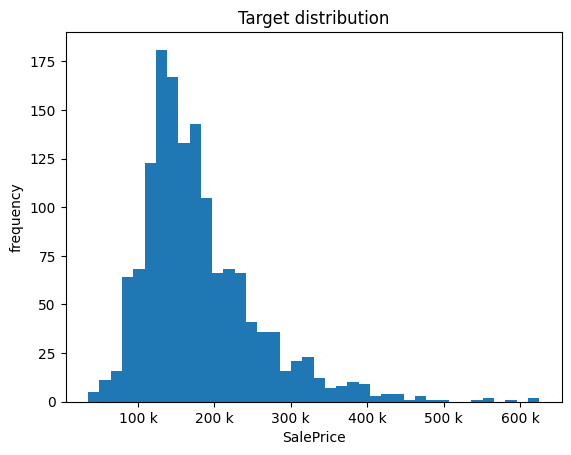

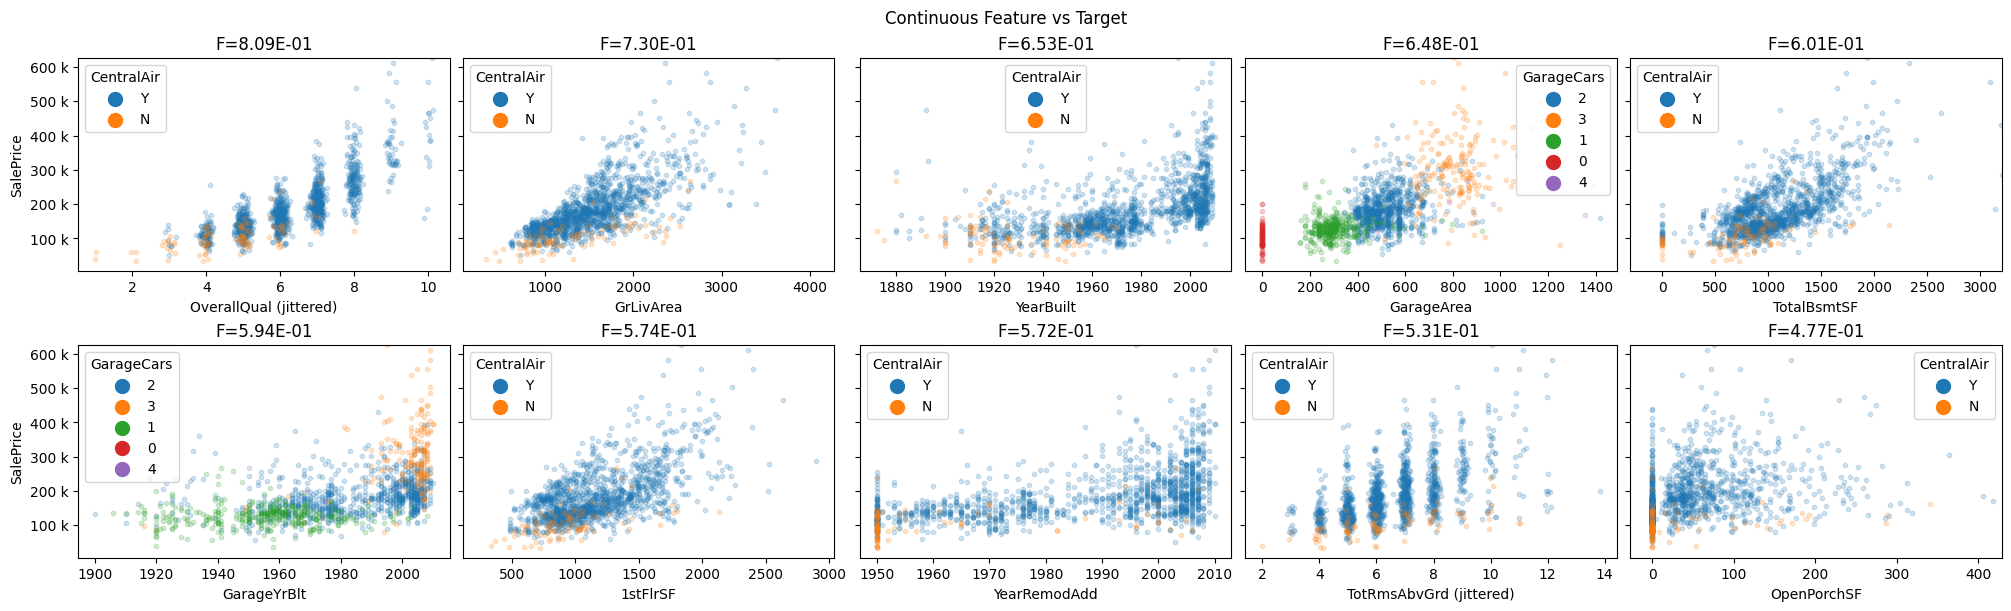

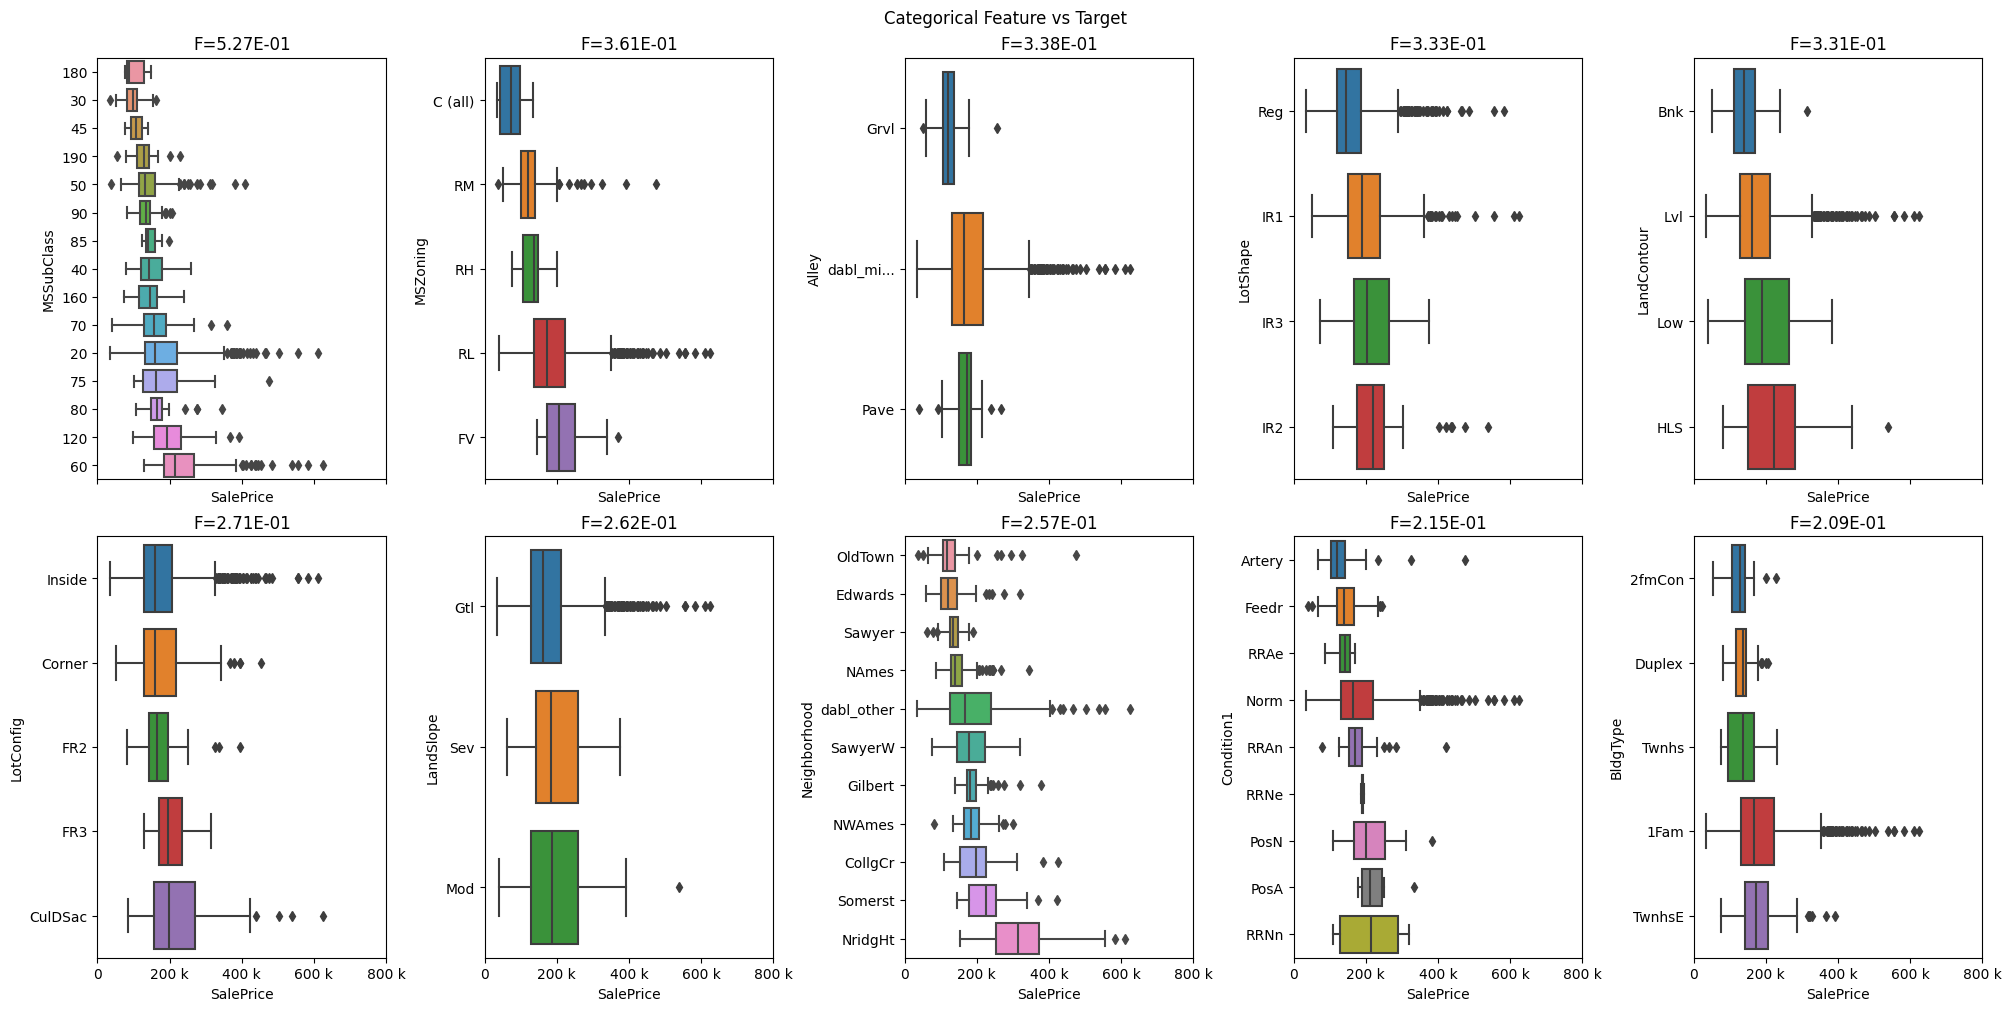

In [15]:
import dabl
dabl.plot(data, target_col = 'SalePrice')

## Basic Probability

* Let's start with a simple example: Say, we flip a fair coin

* Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.

* Therefore, we can say that the Probability of getting a Heads is 0.5. Similarly, Probability of getting a Tails is 0.5

* Probability can roughly be described as **the chance of an event or sequence of events occurring**.

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

### Rules

* The Probability that an event occurs with certainty is 1
* The Probability that an event will not occur surely is 0
* The Probability of the complement of an event is 1 minus the probability of that event.

* The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities

* **Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.**

For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e


$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

Example

The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has restless leg syndrome. Does this imply that 13% of people will have at least one of these problems?

Answer: No, the events can occur simultaneously and so are not mutually exclusive. To elaborate:

* **Let's check out the Probability of picking a house in the Neighborhood - "OldTown"**


No. of houses in OldTown/Total no. of houses
Let's go through this in Python

In [21]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [23]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [136]:
data[data['Neighborhood'] == 'OldTown'].shape[0]

113

In [24]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)


Total Number of Houses in the Old Town Road : 113


In [25]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Probability of picking a house in OldTown: 7.74%


## Conditional Probability

* There are 10 candies in a bag: 5 green, and 5 blue.

* What is the probability of getting 3 blue candies in a row?

* The probability of getting the first blue candy is 5/10, or 1/2.

When we pick a blue candy, though, we remove it from the bag. We're left with 9 candies in total with (5-1 =)4 Blue ones.
So the probability of getting another blue is 4/9.
Similarly, the probability of picking a third blue candy is 3/8

Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

* Our final probability is **1/2 * 4/9 * 3/8, or .0833**. So, there is an 8.3% chance of picking three blue candies in a row.
Simple tricks: Whenever you have to verbally say AND (like we just did above), you will want to MULTIPLY the probabilities
Whenever you have to verbally say OR, you will want to ADD the probabilities.

In [ ]:
bbbbbbbbbb -> 1/10 -> 0.1
gggggbbbbb ->  5/10
gggggbbbb   -> 4/9
gggggbbb    -> 3/8
#without replacement

In [138]:
1/2**3  #with replacement

0.125

**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood ?**

In [28]:
## Enter condtional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is {0:.9f}".
      format(cond_prob*100))

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is 0.594139352


## Simple Probability Distribution

* Lets Take an example, that we throw a dice of containing six faces.
* so, there are Total no. of Combinations = 6*6 = 36

Let’s see how:

2 {(1,1)} => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36

## PDF and PMF

* The probability distribution for a discrete random variable is the **probability mass function** for that variable and similarly and if our random variable takes continuous values the distribution is called a **probability density function**.

* In the previous what we plotted was the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)

* One of the most common Probability Distribution Functions is the Normal Distribution.


## Normal Distribution

* Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

### Checking for Skewness of the data

* We Generally check Askewness in the Target Columns of the data.
* Skewness is a state of distribution where the distribution is highly biased towards the right or left side of the plot.

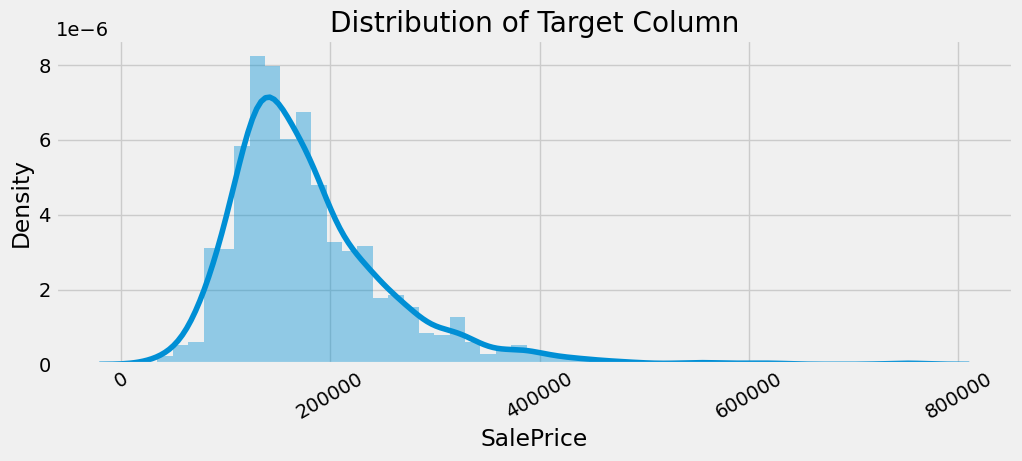

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

* The distribution for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the right
* If we remove the outliers, it'd somewhat resemble a Normal Dstribution

## Z-Score

* The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score".
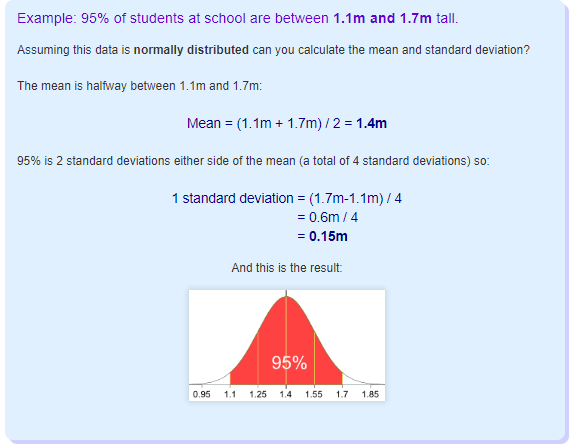
* Let's take an example to better understand the meaning of z-score
    * Let's Suppose the average height of a Student in a class is 1.4 meters
    * In that same class one of the students is 1.85m tall
    * You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4.
    * so, the student with 1.85m height has a **z-score" of 3.0**.

## Inference

### Sample Mean and population Mean

* Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
* But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.

In [38]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )          

# getting the population mean
print("Population mean:", data['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


## Statistical Inference

* This **subset** of the population is nothing but the Sample data

* We carry out various tests on the Sample to gain insight on the larger population out there!

* Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between different data samples.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population.



## Central Limit Theorem

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

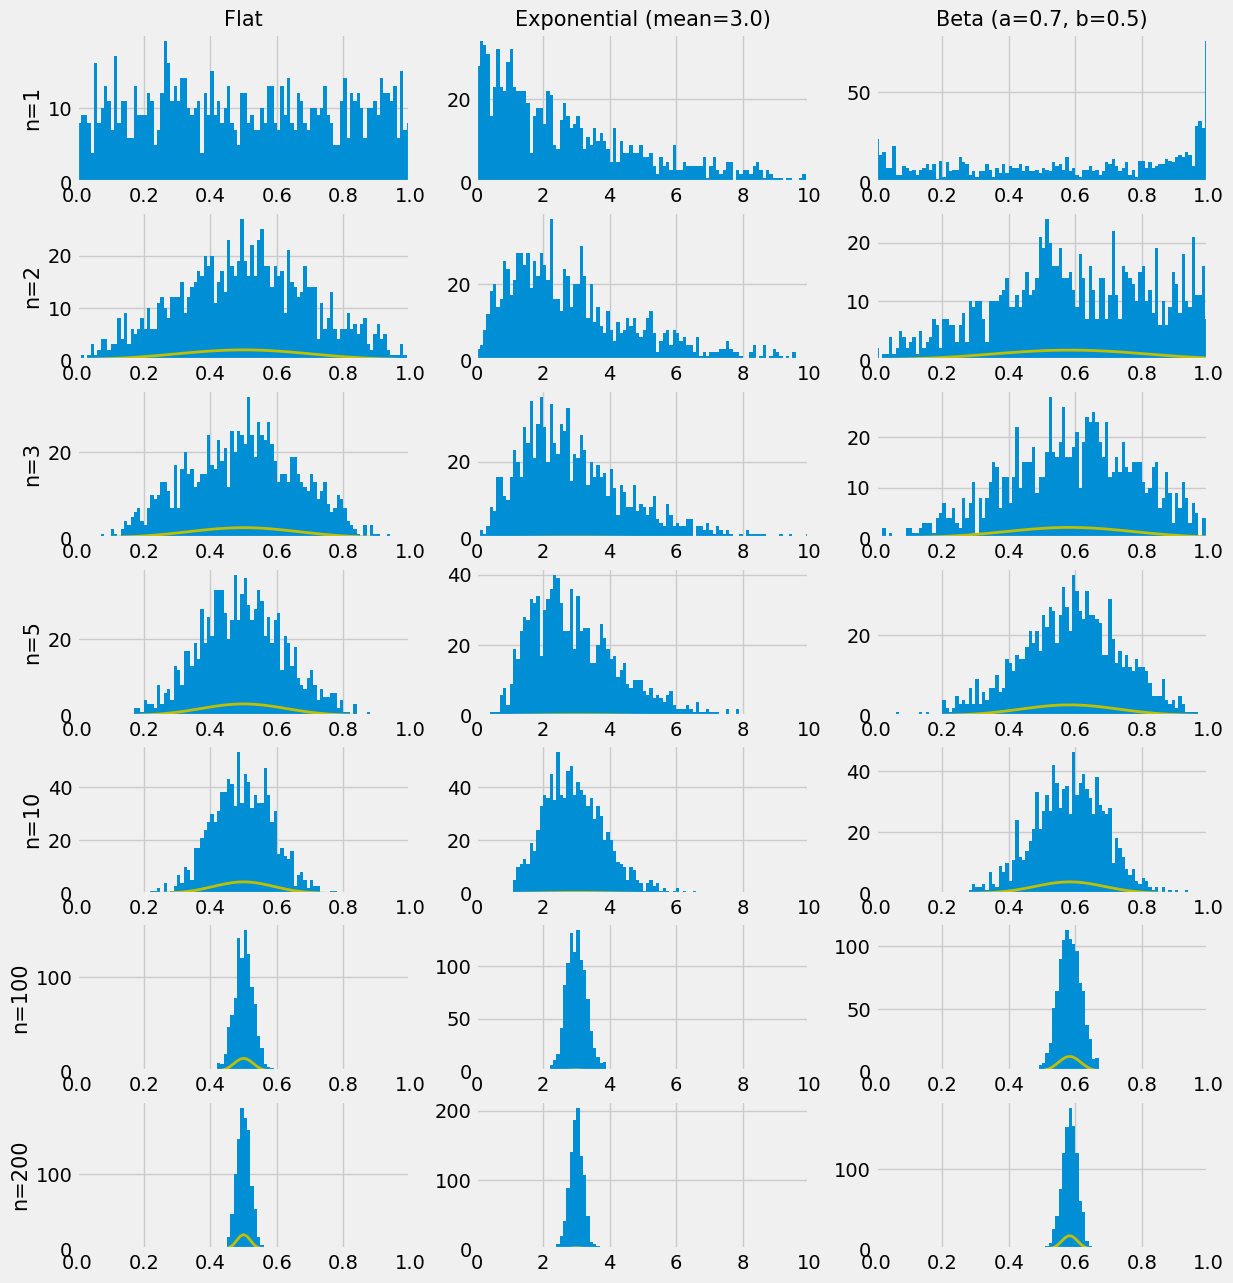

In [41]:
# lets check Central Limit theorem for this data

# provides capability to define function with partial arguments
from functools import partial

# number of samples to average over.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# number of times samples of size n are taken. Try varying this number.
N = 1000

# number of bin boundaries on plots
nobb=101

# mean of exponential distribution
exp_mean=3

# parameters of beta distribution
a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# lets define the title names.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# ranges of the three distributions
drange=np.array([[0,1],[0,10],[0,1]]) 

# means of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)])

# variances of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 

# generates random samples in the specified ranges for the respective distributions.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # loop over number of n samples to average over
for i in range(ln):
     # loop over the different distributions
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j])
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()


In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also,

the mean of the Gaussian distribution is the same as the original parent distribution,
the width of the Gaussian distribution varies with sample size as $1/\sqrt{n}$.

## Confidence Interval

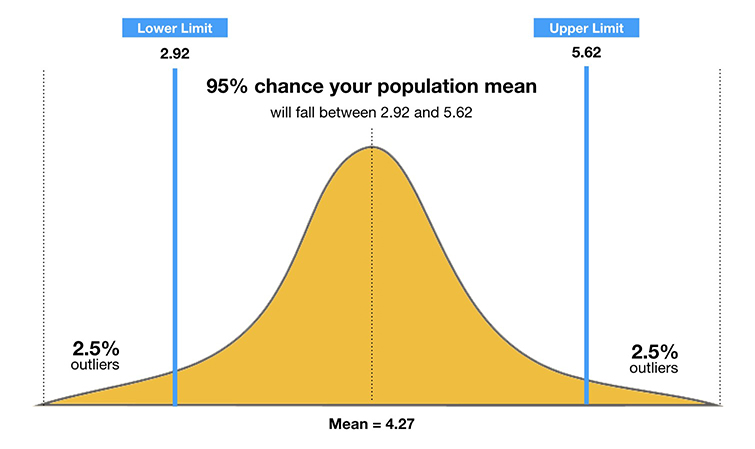


**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.


In [44]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['SalePrice'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
* Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

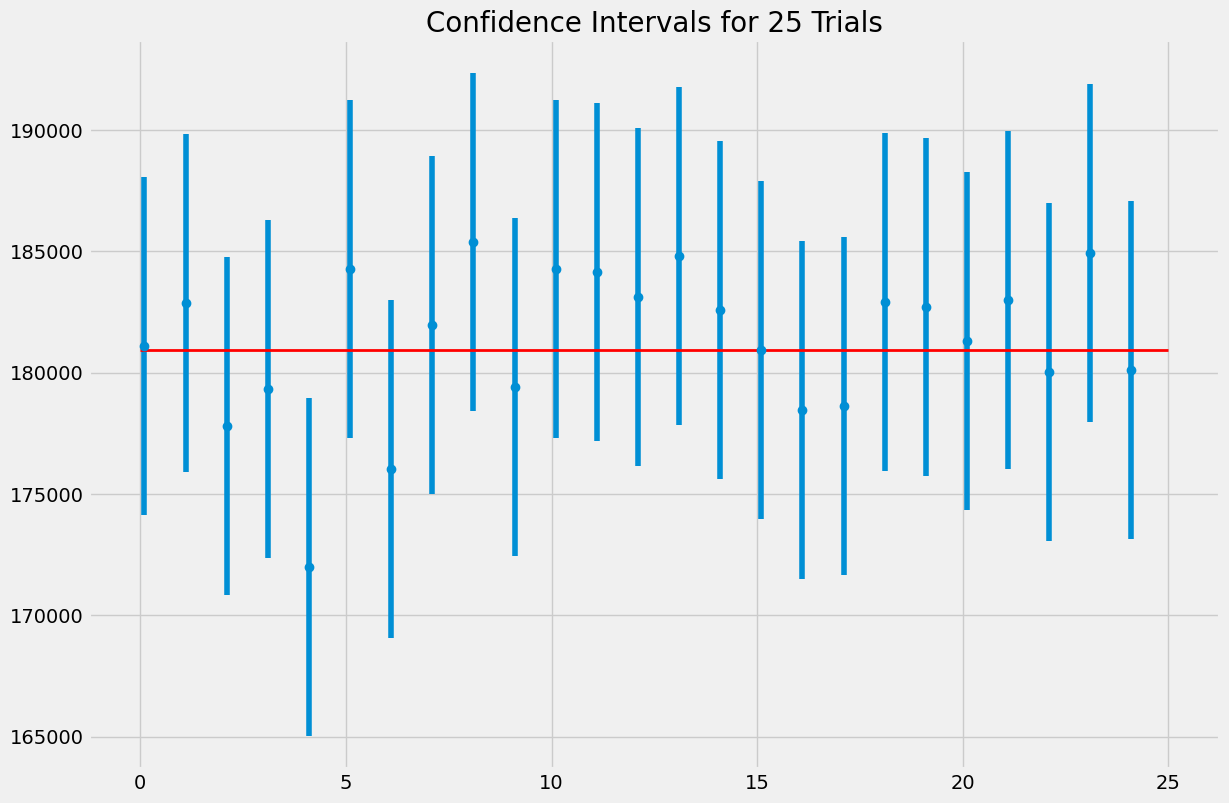

In [46]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[abs(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()


* It is easily visible that 95% of the times the blue lines(the sample meean) overlaps with the red line(the true mean), also 5% of the times it is expected to not overlap with the red line(the true mean).

Ref: 

    https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/
    https://www.cuemath.com/confidence-interval-formula/

## Hypothesis Testing

* $Statistical Hypothesis$, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

### Null Hypothesis

* In Inferential Statistics, **The Null Hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups.**

* Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.

* Therefore, in our case the Null Hypothesis would be:
**The Mean of House Prices in OldTown is not different from the houses of other neighborhoods**

### Alternate Hypothesis

* The alternate hypothesis is just an alternative to the null. For example, if your null is **I'm going to win up to 1000** then your alternate is **I'm going to win more than 1000.** Basically, you're looking at whether there's enough change (with the alternate hypothesis) to be able to reject the null hypothesis

###  The Null Hypothesis is assumed to be true and Statistical evidence is required to reject it in favor of an Alternative Hypothesis.

Ref: 

- https://studiousguy.com/hypothesis-testing-examples-in-real-life/
- https://www.scribbr.com/statistics/hypothesis-testing/
- https://www.scribbr.com/statistics/statistical-tests/
- https://www.scribbr.com/statistics/p-value/
- https://www.scribbr.com/statistics/statistical-significance/
- https://www.scribbr.com/statistics/type-i-and-type-ii-errors/
- https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/
- https://www.statology.org/parametric-tests-assumptions/
- https://www.statology.org/grubbs-test-python/

### P Value

* In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. 

* So now say that we have put a significance (α) = 0.05
* This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true



**Are house prices in OldTown really different from the House Prices of Other Neighborhoods?**

Ref: https://www.datacamp.com/tutorial/t-test-vs-z-test

In [159]:
data[data['Neighborhood'] == 'OldTown']['SalePrice']

8       129900
48      113000
63      140000
68       80000
74      107400
         ...  
1408    125500
1416    122500
1428    119000
1432     64500
1438    149700
Name: SalePrice, Length: 113, dtype: int64

In [165]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


* If the P value if less than 0.05, then we can reject our null hypothesis against the alternate hypothesis.

* **The Probability of getting the given distribution of houseprices in OldTown under the assumption that its mean, is the same as the mean of all house prices.**


### Another way to test: Gosset's (Student's) t-test

* The T-test is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.
* A z-test assumes a sample size >30 to work, but what if our sample is less than 30?
* A t-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.
* Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

### Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

In [167]:
data['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [57]:
print('No of houses in Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))


No of houses in Stone Brook: 25


In [58]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],               # Sample data
                 popmean= data['SalePrice'].mean())  # Pop mean

TtestResult(statistic=5.735070151700397, pvalue=6.558704101036394e-06, df=24)

In [ ]:
0.00000655870 < 0.05

The p-value in this case again is low and we can reject our null hypothesis

## Type 1 and Type 2 Error

* In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis, while a type II error is the non-rejection of a false null hypothesis

### Type 1  and Type 2 Error Example

For example, let's look at the trail of an accused criminal. The null hypothesis is that the person is innocent, while the alternative is guilty. 
* A Type 1 error in this case would mean that the person is not found innocent and is sent to jail, despite actually being innocent.
* A Type 2 Erroe Example In this case would be, the person is found innocent and not sent to jail despite of him being guilty in real.


### Chi Square Test

The term "chi-squared test," also written as χ² test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof.

***A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution.***

For example, 
* *you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire population of your country*.
* *you could check whether the computer browser preferences of your friends match those of Internet uses as a whole.*

* *When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning.*

#### Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:



## Chi-Squared Goodness of fit Test

In [174]:
national[0].value_counts()

0
white       100000
hispanic     60000
black        50000
other        35000
asian        15000
Name: count, dtype: int64

In [170]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600



* **Good Fit**: If the significance value that is p-value associated with chi-square statistics is 0.002, there is very strong evidence of rejecting the null hypothesis of no fit. It means good fit.

In [176]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


## Chi-Sqaured Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.

For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent.

On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent.

### Effect of LandContour on SalePrice

In [191]:
# Let's test if knowing LandContour which is the overall flatness of the property tells us anything about the price

# For this let's divide the SalePrice in three buckets - High, Medium, Low

import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


* The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.

**The frequency distribution reflects this**
* Houses that are Near Flat/Level(Lvl) have an equal distribution of SalePrice.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

In [ ]:
Ref: https://www.scribbr.com/statistics/chi-square-tests/